<a href="https://colab.research.google.com/github/NIKKISAHA/kerasProjects/blob/main/irisClassification/FinalirisClassificationModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
#necess-libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#importing data
data = pd.read_csv("/content/drive/MyDrive/iris.csv")

#two ways of changing atrribute name
data["sepal length"] = data["5.1"]
data["sepal width"] = data["3.5"]
data["petal length"] = data["1.4"]
data["petal width"]=data["0.2"]
data=data.drop(columns=["5.1","3.5","1.4","0.2"])

df=data
df.rename(columns={"Iris-setosa":'catagory'},inplace=True)
df2= pd.DataFrame({"sepal length":5.1,"sepal width":3.5,"petal length":1.4,"petal width":0.2,'catagory':"Iris-setosa"},index=[0])
df=pd.concat([df2,df]).reset_index(drop=True)
df

,sepal length,sepal width,petal length,petal width,catagory
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [20]:
#viewing data
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   catagory      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [21]:
#diving into x  and y
x=df[["sepal length","sepal width","petal length","petal width"]]
df['catagory'].replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)
y=df[['catagory']]
y
y['catagory'].unique()
y.value_counts()
# Iris-setosa,Iris-versicolor,Iris-virginica

catagory
0           50
1           50
2           50
dtype: int64

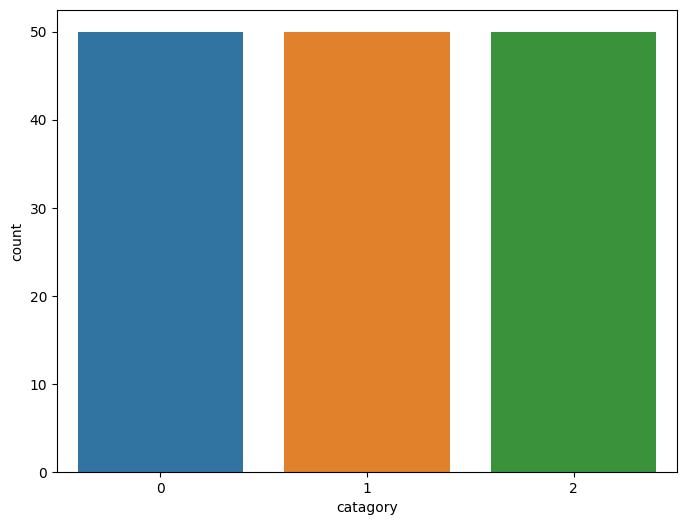

In [22]:
#vizualizing
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='catagory')
plt.xlabel='catagory'
plt.ylabel='count'
plt.show()

In [23]:
# spliting into 4
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape

(120, 4)

In [24]:
#scaling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train_scaled=scale.fit_transform(x_train)
x_test_scaled=scale.transform(x_test)

x_test_scaled

array([[ 0.35451684, -0.57925837,  0.5576453 ,  0.02332414],
       [-0.13307079,  1.67028869, -1.16259727, -1.17620281],
       [ 2.30486738, -1.02916778,  1.81915651,  1.48941263],
       [ 0.23261993, -0.35430366,  0.44296246,  0.42316645],
       [ 1.2077952 , -0.57925837,  0.61498672,  0.28988568],
       [-0.49876152,  0.77046987, -1.27728011, -1.04292204],
       [-0.2549677 , -0.35430366, -0.07311031,  0.15660491],
       [ 1.32969211,  0.09560575,  0.78701097,  1.48941263],
       [ 0.47641375, -1.9289866 ,  0.44296246,  0.42316645],
       [-0.01117388, -0.80421307,  0.09891395,  0.02332414],
       [ 0.84210448,  0.32056046,  0.78701097,  1.08957031],
       [-1.23014297, -0.12934896, -1.33462153, -1.44276436],
       [-0.37686461,  0.99542457, -1.39196294, -1.30948358],
       [-1.10824606,  0.09560575, -1.27728011, -1.44276436],
       [-0.86445224,  1.67028869, -1.27728011, -1.17620281],
       [ 0.59831066,  0.54551516,  0.5576453 ,  0.55644722],
       [ 0.84210448, -0.

***ML Starts here***

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Dropout

In [31]:
model=keras.Sequential()
model.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 1000)              5000      
                                                                 
 dense_14 (Dense)            (None, 500)               500500    
                                                                 
 dense_15 (Dense)            (None, 300)               150300    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_16 (Dense)            (None, 3)                 903       
                                                                 
Total params: 656703 (2.51 MB)
Trainable params: 656703 (2.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [34]:
model.fit(x_train_scaled,y_train,validation_data=(x_test_scaled,y_test),batch_size=20, epochs=10,verbose=1)

Epoch 1/10
6/6 [==============================] - 0s 27ms/step - loss: 0.0718 - accuracy: 0.9833 - val_loss: 0.0253 - val_accuracy: 1.0000
Epoch 2/10
6/6 [==============================] - 0s 20ms/step - loss: 0.0664 - accuracy: 0.9750 - val_loss: 0.0132 - val_accuracy: 1.0000
Epoch 3/10
6/6 [==============================] - 0s 21ms/step - loss: 0.0668 - accuracy: 0.9750 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 4/10
6/6 [==============================] - 0s 23ms/step - loss: 0.0586 - accuracy: 0.9750 - val_loss: 0.0151 - val_accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 0s 18ms/step - loss: 0.0512 - accuracy: 0.9750 - val_loss: 0.0150 - val_accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 0s 21ms/step - loss: 0.0416 - accuracy: 0.9833 - val_loss: 0.0092 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 0s 19ms/step - loss: 0.0540 - accuracy: 0.9667 - val_loss: 0.0100 - val_accuracy: 1.0000
Epoch 8/10
6/6 [===========

In [35]:
test_loss,test_accuracy=model.evaluate(x_test_scaled,y_test)
print("my",test_loss,test_accuracy,)

1/1 [==============================] - 0s 66ms/step - loss: 0.0204 - accuracy: 1.0000
my 0.020408473908901215 1.0


In [36]:
from sklearn.metrics import classification_report
prediction = model.predict(x_test_scaled,verbose=0)

rounded=np.argmax(prediction,axis=1)
# for i in rounded:
#   print(i)
print(classification_report(y_test,rounded))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

